# Predicting Movie Ratings with Critic Reviews Using Classification Models
##### Shriyan Dey, CSE 163 Final Project

### Report - Predicting Movie Ratings with Critic Reviews Using Classification Models


#### Summary
Research Questions:

1. Is it possible to somewhat accurately predict the Rotten Tomato status just by reading the critics’ reviews?



2. Which ML model (and with vectorizer and parameters) most accurately does so?



3. What distinct and key terms indicate a negative (“Rotten”) and a positive (“Fresh”) review towards a movie?






Answers:

1. Yes, critic reviews can be an indicator on a movie’s Rotten Tomato status.

2. Bernoulli Naive Bayes Classifier, ‘alpha’ = 0.76, either vectorizer
   
3. Some key terms that indicate a negative review are “actors”, “people”, “enough”, “lost”, “much”, “make”, and “may”. For positive reviews, key terms were “first”, “characters”, “best”, “one”, “well”, “comedy”, “great”, and “holofcener.”

 

#### Motivation 
Although this project’s focus on movies isn’t the most ideal context, this genre of data analysis project can be a core tool for businesses around the world. Maintaining a successful business, whether it be a small film production company or a large-scale tech giant, is hard to do due to the ever-changing market trends and interests of the consumers. Many companies attempt to leverage data-driven insights by analyzing the sentiment of their clients through reviews or surveys. As businesses are only as successful as their clients make them, feedback is a vital component to any consumer-oriented company. By automating the analysis of feedback, one can approach general conclusions about the consumers’ opinions on their product or service and address any potential inconveniences. Ultimately, this can lead to profits being maximized, losses being minimized, and companies finding the perfect equilibrium that their business should fall in in that state of the market cycle. In this project, I’ll demonstrate a basic sentiment analysis program with which companies can make more well-informed decisions on how to market, distribute, and create their content and/or services to their clients.


#### Data Setting

**Kaggle link to both data sets: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_critic_reviews.csv**

I found this pair of data sets on Kaggle. The first was of the critic reviews for the movies and the columns included general information about the movie (like the id) but mostly revolved around parts of the critic reviews such as the publishers the critics work for, the critics’ names, the ratings, the date the review was published, and the actual text content of the reviews. The second data set is about the details of the movies themselves. Column categories included release date, a movie description, the movie name, content rating, the actors, the director, and the genres.

To generate a suitable data set for the project, I merged these two on the movie_id column because this was a unique identifier for all the movies. After this, I filtered out all of the excess data I didn’t need (including removing rows with NaN values) and kept columns like movie name, review content, review type, and tomatometer status. After this initial preprocessing of the data, I moved onto more complex preprocessing steps that I had to take because of the nature of the data. A way the context of the data complicated my analysis was just the fact that it was all sentences and words. The reason this complicated my analysis is because classification models require numerical input data to predict patterns and couldn’t do it with non-numerical data. At first, I attempted to use the Label Encoding method to give each unique word in the corpus of all the reviews a numerical value and essentially substituting each word with a number one-for-one. This approach took a lot of unnecessarily complicated code and was inefficient to run. Needing to pivot, I resorted to tokenizing the data using two techniques (described in the Method section). An aspect of the data that could deepen my analysis were the various other columns of data I could use to predict the tomatometer status. While using all of these data points probably would’ve led to a more accurate model, it would complicate it (as it needs so many pieces of data to function) and take away from the motivation of this exploration. I wanted to determine how well classification models could differentiate between negative and positive sentiments in word-based reviews. Adding numbers and numerical ratings makes it almost useless to use the actual content of the review (at the beginning of this project, I factored in the top_critic column into the models and got 100% accuracy). So, I intentionally left out data to develop an accurate sentiment analysis model. Lastly, the data itself wasn’t the most representative of actual reviews viewers would likely leave on movies or clients would leave for companies. All the reviews from the data set are exclusively written by professional critics. Although this probably does mean that the data is grammatically correct and the opinions have experience behind them, it it’s fully representative of most real-world feedback data. Therefore, if we were to implement this approach with real user data from casual consumers, there could be a drastically different result.

#### Method.
This project will approach the question—how can we accurately predict the Rotten Tomato rating of a movie using critics’ reviews. 

1. To do this, the first step was preprocessing the data. With both data sets, I used pandas to merge them on the movie_id column. Then, I filtered out all unnecessary columns and was left with the movie title, review content, review type, and tomatometer status columns.

2. As there was text input data being fed into the classification models, vectorization (turning words into matrices of numbers) was a necessary step. To accomplish this, I used both the Bag Of Words and TF-IDF vectorization method separately to later on see which method would result in a more accurate model. I used both vectorization methods to tokenize the ‘X’ data for each model I tested and marked this distinction with subscripts in the models’ variable names. After this, I used one-hot encoding to replace the ‘Rotten’ and ‘Fresh’ values for the with 0 and 1, following the same principle of replacing text data with numerical values.

3. Before fitting the various models with the new, vectorized data, I generated two word clouds (a new Python library which formats words in a corpus artistically, where the font size of each word is proportional to its frequency in the corpus) to show the most frequency words in the positive and negative reviews. This was to get a better understanding of the basic differences in language that critics used to critique and praise movies. Also with this, I was able to answer my third research question.

4. At this point, the preprocessing stage is complete and it’s time to train the models. In this project, I trained five distinct machine learning models with the reviews data set: Decision Tree, Random Forest, k-Nearest Neighbors, Naive Bayes, and Neural Networks. Each had their own classifier object in the scikit-learn library so it was just a matter of writing code to fit them to the data of both tf-idf and bow vectorizations. (Note: for the random forest classifier, I also trained a weighted version based on the distribution of the classes in the data set and for the naive bayes category, I trained four versions of it: Gaussian, Multinomial, Complement, and Bernoulli). While training these models, I kept track of them by adding them to a Set to be used in metric comparison. Also, for each pair of models trained (tf-idf & bow) I plotted a confusion matrix to show how effective the model was at predicting correctly.

5. After training had been done, I iterated through the Set storing all of the models and got all the needed metrics, including precision, recall, accuracy, F1 score, and PR-AUC. I stored each model’s metrics in a pandas DataFrame. Then, to compare the models, I concatenated all the DataFrames and created a large DatFrame with information on all the models’ performance. This made it easy for me to determine which model could predict rating sentiment best: the Bernoulli Naive Bayes Classifier.
With a best-performing model, I utilized scikit-learn’s GridSearchCV object to fine-tune the hypermaters of the BNB Classifier. The only appropriate hyperparameter for naive bayes classifiers is the ‘alpha’ parameter, so I tested various values between 0-1 in the cross-validation. Following the cross-validation, the search determined that the best alpha value was 0.76. So, with this adjusted hyperparameter, we have the best predictive model.


#### Results

1. Is it possible to somewhat accurately predict the Rotten Tomato status just by reading the critics’ reviews?

    Yes, it’s possible to somewhat accurately predict the tomatometer status of a movie from critic reviews. The way I approached answering this question was by using binary classification models from scikit-learn. After testing several types of models, I fine-tuned the hyperparameters of the best predictive model that ultimately was able to predict correctly 76% of the time. I knew that programs were capable of detecting positive and negative sentiment through approaches like NLP. With natural language processing, there are many more complex steps that look at the words themselves. These include stemming and lemmatization which process the words in their simplest, root forms. However, I didn’t know if a simple model could take vectorized sentences and find patterns in positive and negative sentiments. I did expect to arrive at an at least 85% success rate.

2. Which ML model (and with vectorizer and parameters) most accurately does so?
   
    I found out that at the maximum data capacity for the kernel to process (10000 rows), the most effective model was the Bernoulli Naive Bayes Classifier with an alpha parameter of 0.74. Before the project I really had no idea which model would classify the data most accurately but I thought I knew which vectorization would work better. I thought that since text data was being analyzed over a large corpus, the tf-idf vectorizer would weight less frequent words higher and this would allow models to catch extreme words on either side of the spectrum and thus have an easier time accurately sorting them. While this was true for most of the other models, the vectorization had no effect whatsoever on the BernoulliNB Classifier. I don’t fully understand why but it might be the way the classifier works on a deeper level. Along with it being the highest scoring in every metric, BernoulliNB’s confusion matrix was by far the most even one out of the lot. It’s clear with visual and numerical evidence that the BernoulliNB classifier was the most successful at predicting critics’ review sentiment.

3. What distinct and key terms indicate a negative (“Rotten”) and a positive (“Fresh”) review towards a movie?

    From the word cloud plots I created, determined the following: key terms that indicate a negative review are “actors”, “people”, “enough”, “lost”, “much”, “make”, “may”, and “cgi” and those for positive reviews were “first”, “characters”, “best”, “one”, “well”, “comedy”, “great”, and “holofcener.” In both, the most common two words were “film” and “movie.” It makes sense that in both positive and negative reviews, critics used those two words the most so this didn’t surprise me. What I was surprised by, however, was how much this data makes sense. When people critique movies, they usually blame the actors, the people in the movie, or even the cgi. These were all common amongst the negative reviews. On the other side, when people praise a movie, they talk about how great it was, how it was the best one in the franchise, or how they love comedies. As intuitive and basic these correlations seem to humans, the fact that a computer program can pick these up shows that the data is both accurate and the models are able to differentiate between these sentiments using these word patterns. (Note: an interesting word for the positive reviews that had a weirdly high frequency  was “holofcener.” That’s the last name of director Nicole Holofcener who directed a couple average movies and TV shows. This is the only inconsistency in the data that I found from the world clouds).


#### Impact and Limitations

With the results I gathered from this project, there are inevitably both implications and limitations, starting with the ideal ML model for text-based sentiment analysis being the Bernoulli Naive Bayes Classifier. Out of the research I had done on common binary classification models and the results of my testing, my project arrived at this very conclusion. However, there were many limitations that hindered me from verifying if this was actually true, the largest of which being the data size. The total post-processed data set contains over 1.1 million rows. Obviously for machine learning and training models, more data would lead to more accurate answers. I found this when I incrementally increased the amount of data I used and got proportionally better results. However, the limit on the amount of data my program and kernel could process before crashing was ~10000 rows of data. This isn’t nearly the 1.1 million that I could’ve processed and with all of this data, other models could’ve learned to analyze sentiment better than the BernoulliNBC. Another limitation of this data is that it only utilized critic reviews. This favors critics’ opinions to those of regular audience members—the perspective that movie companies would probably care more about. For any business, the intended consumer’s feedback is the most important for driving goals and profitability, and for movies it’s not the critics but the audience. Therefore, my predictions shouldn’t be used to jump to conclusions about the general audience’s sentiment on movies. Finally, I didn’t use more apt approaches to problems like this (for example NLP), and didn’t experiment with every single hyperparameter and model because of limited memory space. 


#### Challenge Goals

1. New Library

    In my proposal, my first challenge goal I wanted to meet was working with multiple data sets. When I’d come up with the original idea for the project and found the Kaggle of two related datasets, I thought this would be a prerequisite for me anyways. However, when I changed my project from working with both word-based and numerical/categorical data to just the critics’ reviews, I no longer needed to use the second data set. So, instead, I decided to focus on the words of the reviewers, and python’s wordcloud library was a great tool to visualize the distribution of the specific vocabulary in the reviews. As seen in my code, I generated two word clouds (split for positive and negative reviews).

2. Machine Learning

   This goal stayed relatively the same throughout the project, even when I changed the trajectory of it midway through. I trained five different types of scikit-learn classifiers, two more than I aimed for. When I decided to focus on one data set, I did so in part because I wanted to focus more on the model-training aspect of the process. My goal with the new (and current) project was to learn more about the strengths and drawbacks of different types of classification models and observe the data-training process rather than the data itself. Along with this, I worked with vectorizers, cross-validation hyperparameter tuning, and model metrics. Learning the basics of machine learning was by far the part of the project I enjoyed most.


#### Plan Evaluation
My proposed work plan estimates were very far from the reality of how long it actually took to complete this project. Part of the reason why was because I slightly changed the direction of my project halfway through completing my original proposal plan. This was because there were technical difficulties achieving the goals with the original and I decided that I wanted to explore more about the various classification models and fine-tuning with word-based data rather than simply using numerical data points as we did in class. In the end, the amount of time I took writing the code, researching documentation, writing tests, learning about machine learning and language processing techniques, and debugging was approximately 40 hours which was double the amount of time I expected to spend on this project.


#### Testing
In terms of testing, there was very little I could actually test. A majority of my code was centered around the classification models which I fit and trained with the data. To test these models, I implemented some of the techniques we used during our machine learning lessons in class including fine-tuning hyperparameters using GridSearchCV and validating the accuracy of the models using various metrics like precision, recall, accuracy, F1 score, and PR-AUC. I also plotted confusion matrices for each of the models before and after fine-tuning their hyperparameters which are classification models’ equivalent for a linear regression plot. Confusion matrices made determining the accuracy of the models very intuitive and quick. Using a combination of these three methods, I found best to test such a wide variety of ML models. On top of these functions though, I defined some functions which could be tested. For these, I mainly used assert statements where I could like we practiced throughout the quarter. Some of the methods I wrote produced visualizations (like the confusion matrices and word clouds). Although I tried to find ways to test these methods online, I never found a succinct answer. Instead, to verify these methods, I made sure to follow the documentation closely but more importantly, cross-reference what the visualization displayed with the numerical data that I could actually verify (from the show_metrics() method) which were directly produced from scikit-learn’s class methods. Finally, for the last method I had in the file, which printed out the prediction for a given movie title, I simply used doctests. I opted for doctests over assert statements because the method didn’t return anything and instead printed out the output to the console. This was paired with checking whether the actual tomatometer status of the movie was the same as the predicted one (this last test is more of a testament to how well the predictive model worked and not so much about testing if the code works as intended). 


#### Collaboration
During the completion of this project, I mainly used online articles, guides, and the scikit-learn documentation to write my code. I worked on this project individually and didn’t consult any course staff nor did I use any generative AI. The large part of the research I did was from small syntaxical questions I had with pandas, matplotlib, wordcloud, or the various models, and finding out about concepts I didn’t know like the model metrics and hyperparameter tuning. The main online sources I used for this project can be found in the last cell of my Jupyter Notebook.



## Pre-processing

### Create Data Set

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import doctest

In [28]:
# Create a pandas DataFrame
# kaggle Link: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset/data?select=rotten_tomatoes_movies.csv
critics_data = pd.read_csv("rotten_tomatoes_critic_reviews.csv")
movies_data = pd.read_csv("rotten_tomatoes_movies.csv")

In [29]:
# Number of reviews is ~1,130,000
print(f"Number of reviews: {critics_data.shape[0]}")

# Number of movies is ~17700 
print(f"Number of movies: {len(critics_data.rotten_tomatoes_link.unique())}")

Number of reviews: 1130017
Number of movies: 17712


Here, we merge the two data sets on the column value `rotten_tomatoes_link` which appears in both dataframes. After filtering the relavant columns for this exploration and removing `NaN` or missing values, the new data frame is shown below:

Note: Only the first 7500 rows are selected to test the models on a smaller data set and reduce the time and toll on the Jupyter server (I tried with the whole one million rows and the kernel kep crashing!)

In [30]:
# DO NOT RUN MULTIPLE TIMES
NUM_DATA = 7500
reviews_data = critics_data.merge(movies_data, how='inner', on=['rotten_tomatoes_link'])
reviews_data = reviews_data[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'tomatometer_status']]
reviews_data = reviews_data.dropna()
reviews_data_sub = reviews_data[:NUM_DATA]
reviews_data_sub.head()

,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [31]:
# Encoding the review_type into numbers
# Fresh = 1; Rotten = 0
reviews_data_sub['review_type'] = reviews_data_sub['review_type'].replace(['Rotten', 'Fresh'], [0, 1])

In [32]:
data = reviews_data_sub[['review_content', 'review_type']]
data.head()

,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


### Splitting Training and Testing Data

In [33]:
from sklearn.model_selection import train_test_split

X = data['review_content']
y = data['review_type']

# Split the data set into training and testing data (ratio: 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Tokenization

I'll explore two ways to tokenize the String data using both a Bag-Of-Words (BOW) vectorizer and a TF-IDF vectorizer.

In [34]:
# Tokenization - Ex. CountVectorizer, TfidfVectorizer
# Can experiment with strip_accents, max_df, stop_words, lowercase, ngram_range
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words Vectorization
# min_df=1 sigifies that the word must appear in at least 1 document in the corpus to be vectorized
bow_vectorizer = CountVectorizer(min_df=1)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()

# Represents the words as matrix vectors, giving them a numerical value
# Only have to vectorize the X values because y (target) value is already a number
X_train_bow = bow_vectorizer.fit_transform(X_train).toarray()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()

In [35]:
"""
Returns a string with the same value as the inputted variable or a None object if 
it isn't possible to represent a variable as a string; used in show_metrics() method
to use the variable names as strings.
Source: https://www.techieclues.com/blogs/how-to-get-variable-name-as-string-in-python
"""
def get_variable_name(variable):
    for name in globals():
        if id(globals()[name]) == id(variable):
            return name
    for name in locals():
        if id(locals()[name]) == id(variable):
            return name
    return None
    
var1 = "hello"
assert get_variable_name(var1) == 'var1'
sI91 = "0"
assert get_variable_name(sI91) == 'sI91'
double = 2.0
assert get_variable_name(double) == 'double'
int = 223
assert get_variable_name(int) == 'int'

# We'll primarly use this function for variables storing references to models
#from sklearn.tree import DecisionTreeClassifier
#dtc_bow = DecisionTreeClassifier()
#assert get_variable_name(dtc_bow) == 'dtc_bow'

### Positive and Negative Word Patterns

Let's take a look at some of the most common words used in both positive and negative critic reviews:

In [36]:
# Uncomment line below if wordcloud isn't downloaded
#! pip install wordcloud
from wordcloud import WordCloud
import re

"""
Returns a list of words present in the given Series; words are in all lowercase,
split on spaces, punctuation is removed, and can be repeated in the returned corpus
"""
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

# Testing case: one word per item, odd-casing, punctuations
d1 = {'col': list(x for x in "Hi mY, name is Shriyan Dey!".split())}
df1 = pd.DataFrame(data=d1)
assert text_transformation(df1['col']) == list(x for x in "hi my name is shriyan dey".split())

# Testing case: multiple and varied number of words per item, ordering, empty case
d2 = {'col': [["This is the first sentence"], ["Second sentence"], [], ["Fourth"]]}
df2 = pd.DataFrame(data=d2)
assert text_transformation(df2['col']) == ["this is the first sentence", "second sentence", "", "fourth"]

In [37]:
"""
Returns a wordcloud object made from the given list of text
"""
def generate_wordcloud(corpus):
    word_cloud = ""
    for row in corpus:
        for word in row:
            word_cloud+=" ".join(word)
    
    wordcloud = WordCloud(width=1000, height=500, background_color='white',
                          min_font_size=10, min_word_length=3,
                          normalize_plurals=False, max_font_size=150).generate(word_cloud)

    return wordcloud
# Don't know and didn't find ways to  write tests for visualizations

In [38]:
# Seperate out positive and negative reviews in the df
positive_reviews = []
negative_reviews = []
for row in data.iterrows():
    if row[1][1] == 1: # positive
        positive_reviews.append(row[1][0])
    else: # negative
        negative_reviews.append(row[1][0])

# Show each of their wordclouds
positive_reviews = text_transformation(positive_reviews)
negative_reviews = text_transformation(negative_reviews)

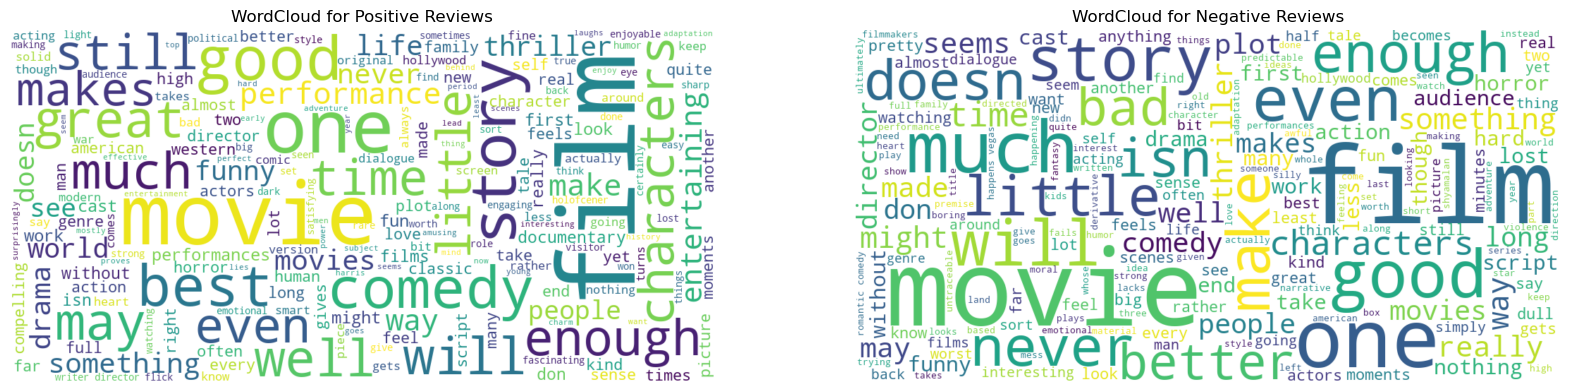

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.imshow(generate_wordcloud(positive_reviews), interpolation="bilinear")
ax1.set(title="WordCloud for Positive Reviews")
ax1.axis("off")
ax2.imshow(generate_wordcloud(negative_reviews), interpolation="bilinear")
ax2.set(title="WordCloud for Negative Reviews")
ax2.axis("off")
plt.show()

(Note: the largest words in both positive and negative reviews were 'film' and 'movie'. This makes sense to us because whether a movie rating is critiquing the movie or praising it, it probably needs to mention either or both of those words. In most wordcloud examples, common words like this would be taken out using a list of common words calle `stopwords`. As the name implies, these common words that weren't special to the data would be removed in order to center the data around the data-specific vocabulary. These wordclouds use a common stopwords list called 'english' which contains common words in writing but in hindsight I could;ve used a stopwords list with common words in reviews like 'film' and 'movie'.)

### Testing Metrics and Visualizations

In [40]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, log_loss, f1_score, roc_auc_score, classification_report, accuracy_score
"""
Returns a DataFrame for a model that details its metrics for each class; metrics 
include model name, precision, recall, f1 score, accuracy, and area under the 
precision-recall curve (PR-AUC)
"""
def show_metrics(model):
    model_name = get_variable_name(model)
    model_attr = model_name.split("_")

    if model_attr[1] == "bow":
        y_predicted = model.predict(bow_vectorizer.transform(X_test).toarray())
        vec_type = "Bag of Words"
    else:
        y_predicted = model.predict(tfidf_vectorizer.transform(X_test).toarray())
        vec_type = "TF-IDF"

    report = pd.DataFrame(data=classification_report(y_test, y_predicted, output_dict=True))
    report.drop(['macro avg', 'weighted avg', 'accuracy'], axis=1, inplace=True)
    report.drop('support', inplace=True)
    report = report.T
    report["model"] = model_name
    report["accuracy"] = round(accuracy_score(y_test, y_predicted), 6)
    recall, precision, thresholds = metrics.precision_recall_curve(y_test, y_predicted)
    report["PR-AUC"] = round(metrics.auc(recall, precision), 6)
    return report

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

"""
Returns an axis containing two Confusion matricies for a model; takes in a model's
TF-IDF vectorized form and Bag of Words vectorized form and generates confusion 
matricies for both to be returned
"""
def plot_confusion_matrix(model_bow, model_tfidf):
    _, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

    for model, model_name, vectorizer, ax in zip((model_bow, model_tfidf), (get_variable_name(model_bow), get_variable_name(model_tfidf)), 
                                             (bow_vectorizer, tfidf_vectorizer), (ax1, ax2)):
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            vectorizer.transform(X_test).toarray(),
            y_test,
            cmap=plt.cm.Purples,
            ax=ax
        )
        disp.ax_.set_title(f"Confusion Matrix for {model_name}")
    return ax
# Don't know and didn't find ways to  write tests for visualizations 

### Storing the Models

In order to compare the metrics of all the models in the end, we'll incrementally add them to a `Set` as we train and fit them.

In [42]:
# Will be used to store all the models for future comparison
models = set()

## Classification Models

### Decision Tree

These are the most basic and intuitive classification models. Though it probably will be too simplistic and one-dimensional for our purposes of sentiment analysis from words, the `DecisionTreeClassifier` provides a stable starting point. Note: the `random_state` parameter for the model is a seed which we generate all the randomness that these models work with. Keeping this seed consistent throught the exploration will ensure that randomness isn't a changing factor.

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Create a model using X_train vector data from both vectorizers (BoW and TF-IDF)
dtc_bow = DecisionTreeClassifier(random_state=42).fit(X_train_bow, y_train)
dtc_tfidf = DecisionTreeClassifier(random_state=42).fit(X_train_tfidf, y_train)

models.add(dtc_bow)
models.add(dtc_tfidf)

To visualize the predicitive capability of these models as we go, I'll plot a `Confusion Matrix` for each model. A confusion matrix is a visualization for the performance of machine learning models that summarizes key metrics such as True Positive, True Negative, False Positive, and False Negative rates. To explain these concepts, let's see how a confusion matric looks like: 

<Axes: title={'center': 'Confusion Matrix for dtc_tfidf'}, xlabel='Predicted label', ylabel='True label'>

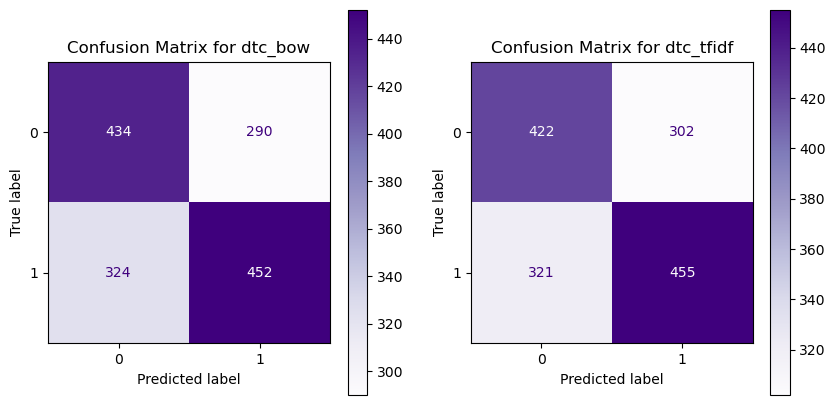

In [54]:
plot_confusion_matrix(dtc_bow, dtc_tfidf)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc_bow = RandomForestClassifier(random_state=42).fit(X_train_bow, y_train)
rfc_tfidf = RandomForestClassifier(random_state=42).fit(X_train_tfidf, y_train)

models.add(rfc_bow)
models.add(rfc_tfidf)

<Axes: title={'center': 'Confusion Matrix for rfc_tfidf'}, xlabel='Predicted label', ylabel='True label'>

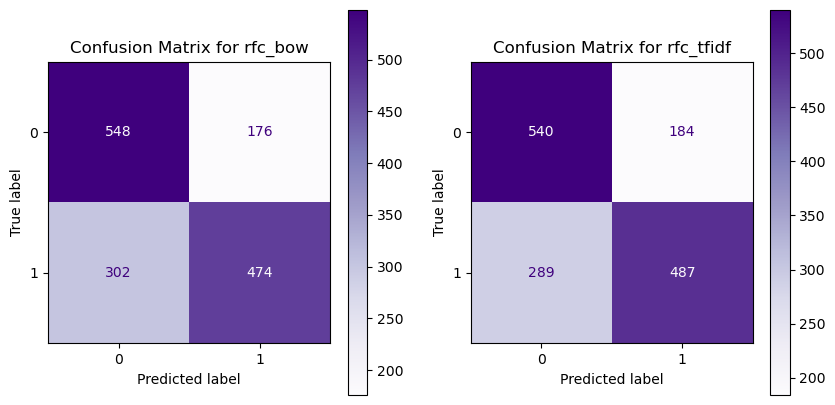

In [56]:
plot_confusion_matrix(rfc_bow, rfc_tfidf)

Let's take a look at the distribution of the data set to more clearly see which choice the model is better fitted to (1 or 0).

Text(0, 0.5, 'count')

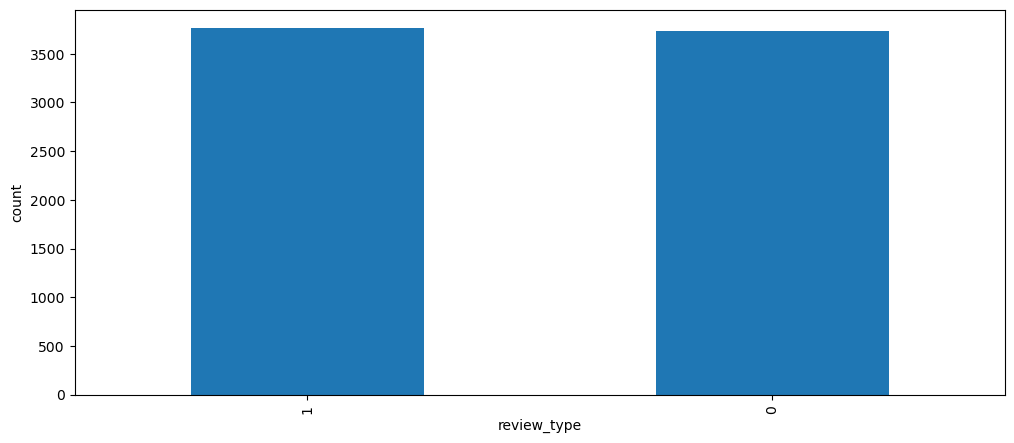

In [57]:
_, ax = plt.subplots(figsize=(12, 5))
data['review_type'].value_counts().plot(kind='bar', ax=ax)
ax.set_ylabel("count")

As you can see, in the data set, there are more `'Fresh'` and `1` values for the `review_type`. This means our current models have an **algorithmic bias** as our models are trained to predict Fresh reviews better than Rotten ones. To solve this imbalance issue, I'll weigh the classes (`1` and `0`) based on their respective class weights in the data set. This can be done by calculating the class weights and using it as a hyperparameter in a **Weighted Random Forest Classifier**.

In [58]:
# Calculating the weights of 1 and 0
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(data["review_type"]), y=data["review_type"].values)

# Creating a dictionary with the classes as keys and values as their weight
class_to_weight = {}
for option, weight in zip(data["review_type"].unique().tolist(), class_weights.tolist()):
    class_to_weight[option] = weight

print(class_to_weight)

{1: 1.003747323340471, 0: 0.9962805526036131}


Now we creat a new `RandomForestClassifier` and factor in the class weights:

<Axes: title={'center': 'Confusion Matrix for wrfc_tfidf'}, xlabel='Predicted label', ylabel='True label'>

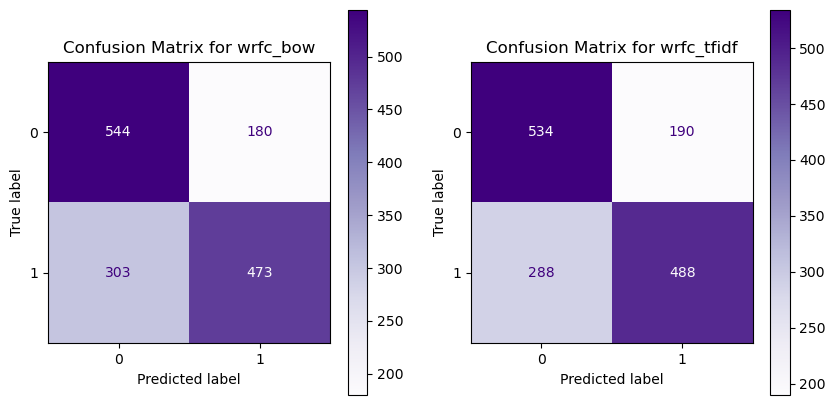

In [59]:
wrfc_bow = RandomForestClassifier(class_weight=class_to_weight, random_state=42).fit(X_train_bow, y_train)
wrfc_tfidf =  RandomForestClassifier(class_weight=class_to_weight, random_state=42).fit(X_train_tfidf, y_train)

models.add(wrfc_bow)
models.add(wrfc_tfidf)
plot_confusion_matrix(wrfc_bow, wrfc_tfidf)

### k-Nearest Neighbors

<Axes: title={'center': 'Confusion Matrix for knn_tfidf'}, xlabel='Predicted label', ylabel='True label'>

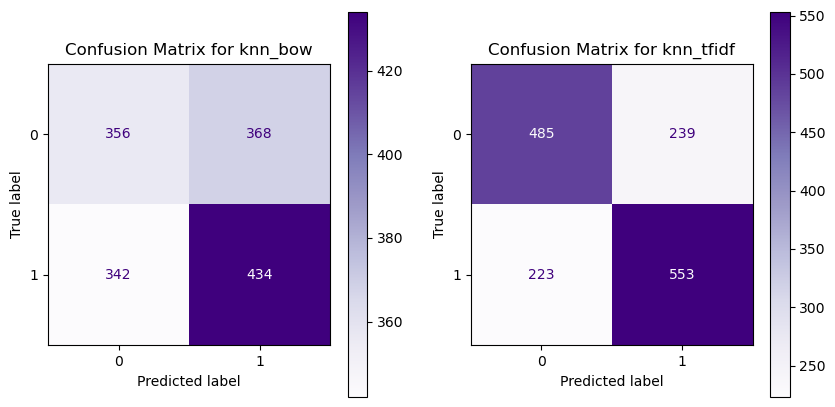

In [60]:
from sklearn.neighbors import KNeighborsClassifier

# Can make an interactive graph plotting metrics with changes in n_neighbors
knn_bow = KNeighborsClassifier(n_jobs=-1).fit(X_train_bow, y_train)
knn_tfidf = KNeighborsClassifier(n_jobs=-1).fit(X_train_tfidf, y_train)

models.add(knn_bow)
models.add(knn_tfidf)
plot_confusion_matrix(knn_bow, knn_tfidf)

### Naive Bayes

In [43]:
# There are four, and we're gonna try all four
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [62]:
gnb_bow = GaussianNB().fit(X_train_bow, y_train)
gnb_tfidf = GaussianNB().fit(X_train_tfidf, y_train)

models.add(gnb_bow)
models.add(gnb_tfidf)


mnb_bow = MultinomialNB().fit(X_train_bow, y_train)
mnb_tfidf = MultinomialNB().fit(X_train_tfidf, y_train)

models.add(mnb_bow)
models.add(mnb_tfidf)


cnb_bow = ComplementNB(norm=True).fit(X_train_bow, y_train)
cnb_tfidf = ComplementNB(norm=True).fit(X_train_tfidf, y_train)

models.add(cnb_bow)
models.add(cnb_tfidf)


bnb_bow = BernoulliNB().fit(X_train_bow, y_train)
bnb_tfidf = BernoulliNB().fit(X_train_tfidf, y_train)

models.add(bnb_bow)
models.add(bnb_tfidf)

<Axes: title={'center': 'Confusion Matrix for bnb_tfidf'}, xlabel='Predicted label', ylabel='True label'>

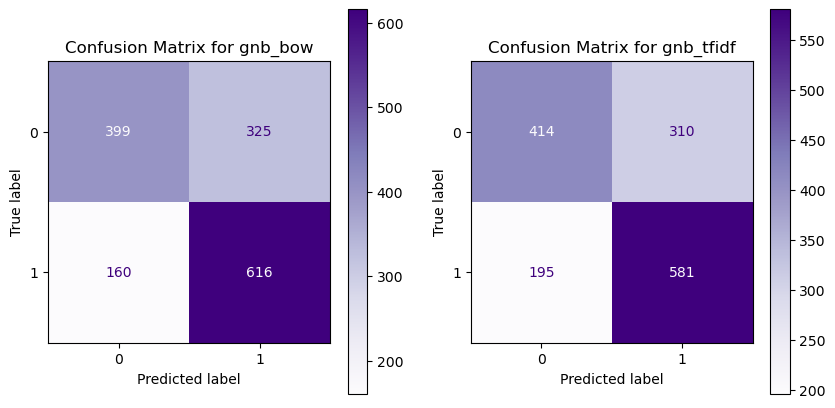

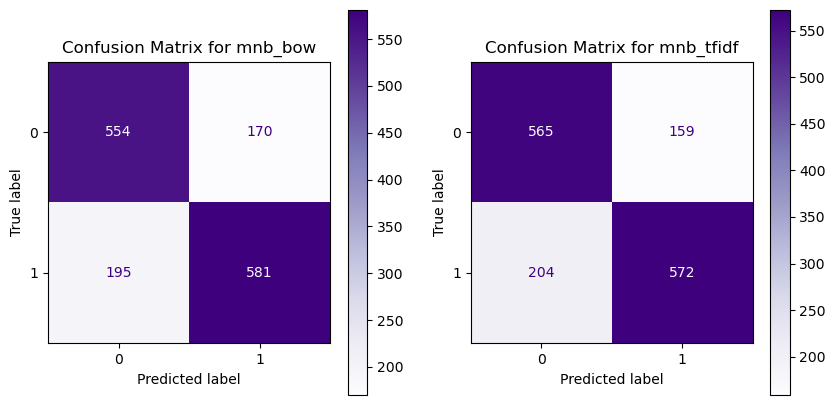

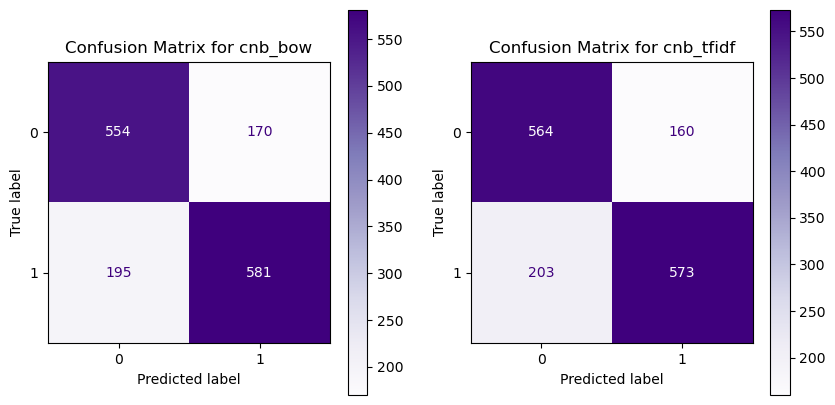

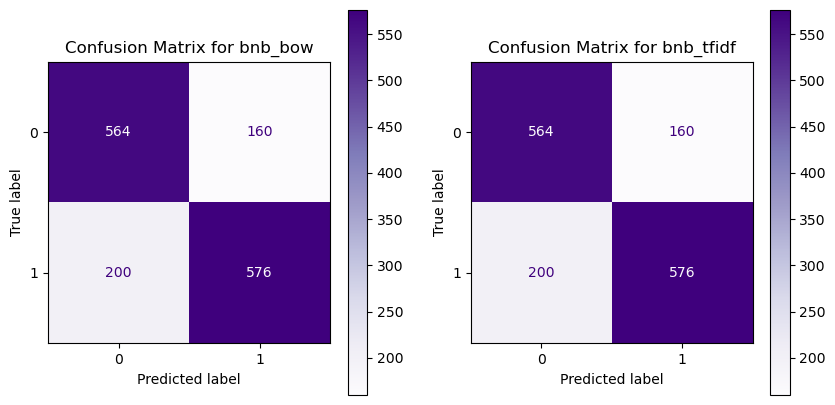

In [63]:
plot_confusion_matrix(gnb_bow, gnb_tfidf)
plot_confusion_matrix(mnb_bow, mnb_tfidf)
plot_confusion_matrix(cnb_bow, cnb_tfidf)
plot_confusion_matrix(bnb_bow, bnb_tfidf)

### Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
nn_bow = MLPClassifier(hidden_layer_sizes=(20, 20)).fit(X_train_bow, y_train)
nn_tfidf = MLPClassifier(hidden_layer_sizes=(20, 20)).fit(X_train_tfidf, y_train)

models.add(nn_bow)
models.add(nn_tfidf)

<Axes: title={'center': 'Confusion Matrix for nn_tfidf'}, xlabel='Predicted label', ylabel='True label'>

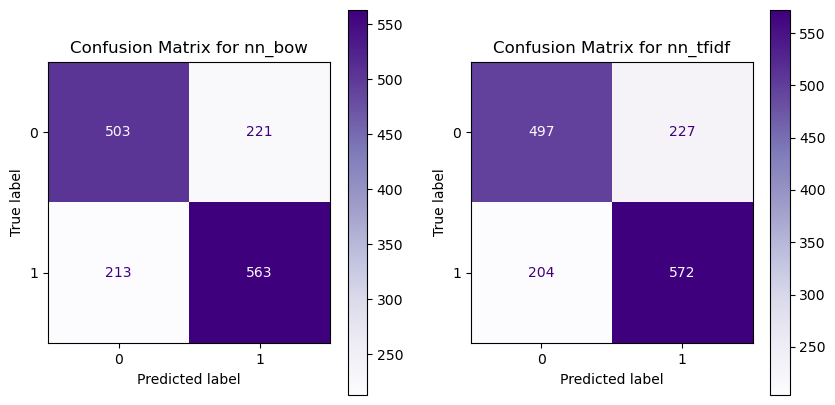

In [66]:
plot_confusion_matrix(nn_bow, nn_tfidf)

## Model Comparison

So, to recap, these are the metrics we'll use to evaluate the efficacy of the models in order from most important to least. 

- **F1 Score**
- **PR-AUC**
- **Accuracy**
- **Precision**
- **Recall**

Although there are other metrics such as `Log-Loss` and the `ROC-AUC`, the five I'm centering the fine-tuning around are the most basic to understand and cover the needs of most binary classification.

There's a new metric that we haven't talked about yet and that's the `PR-AUC` column in the model comparison data set. PR-AUC means Area Under the Curve of the Precision Recall graph. The Precision-Recall graph is exactly as it sounds--a line graph that shows the relationship between `precision` and `recall` for various thresholds. As we discovered before, the higher the precision score usually is, the lower the recall score will be and vice-versa. This graph shows the tradeoff between these two metrics with precision on the x-axis and recall on the y-axis.

The reason I opted to use the area under the precision-recall curve rather than the area under the ROC (Receiver Operating Characteristic) curve is because the PR-AUC metric is more indicative of the efficacy of a binary classificaion model when the probability of the classes are more imabalanced as we previously discovered is true of this dataset. 

In [67]:
dfs = []
names = []
for model in models:
    curr_df = show_metrics(model)
    dfs.append(curr_df)

In [68]:
result = pd.concat(dfs)
result = result.reset_index().rename(columns={"index":"class"})
result.set_index(['model', 'class'], inplace=True)
# Sorting the models on the metrics: f1 score, PR-AUC, accuracy
result.sort_values(by=['f1-score', 'PR-AUC', 'accuracy'], ascending=False, inplace=True)
display(result)

,,precision,recall,f1-score,accuracy,PR-AUC
model,class,,,,,
bnb_tfidf,1,0.782609,0.742268,0.761905,0.760000,0.311772
bnb_bow,1,0.782609,0.742268,0.761905,0.760000,0.311772
cnb_bow,1,0.773635,0.748711,0.760969,0.756667,0.308840
mnb_bow,1,0.773635,0.748711,0.760969,0.756667,0.308840
cnb_tfidf,1,0.781719,0.738402,0.759443,0.758000,0.310394
mnb_tfidf,1,0.782490,0.737113,0.759124,0.758000,0.310468
bnb_tfidf,0,0.738220,0.779006,0.758065,0.760000,0.311772
bnb_bow,0,0.738220,0.779006,0.758065,0.760000,0.311772
mnb_tfidf,0,0.734720,0.780387,0.756865,0.758000,0.310468


## Fine-tuning Hyperparameters (Testing)

Testing the accuracy of classification models such as this one is a complicated task. At the base level, we can **fine-tune** our model's hyperparameters to get the metrics we talked about above to the most ideal levels we can. I'll do this using a technique called **cross-validation** with scikit-learn's `GridSearchCV`. This process goes through all the possible combinations of hyperparameter values provided to it, each time averaging the scoring metrics based on the number of folds. Folds are the number of times the grid search will create the same model (with the exact same hyperparameters). 

This process takes a long time to run and utilizes a lot of resources through all the possible combinations. Doing this for each model in the above table could take days. So to save ourselves some time, I'm going to prioritize only running a cross-validation on the most accurate model already to maximize the chances for the best predictive model. 

As we said above, the best metric to look at when wanting to maximze the efficacy of a binary classification with minor class weights is the f1-score (for threshold-dependent) along with the PR-AUC (for threshold-independent). From all the models above and their respective confusion matricies, the best-performing model in both these categories is clearly `bnb_tfidf` (for both classes (0 and 1)).

(Note: rather than using PR-AUC, I'm using `roc_auc_ovo_weighted` as the threshold-independent scoring metric because scikit-learn doesn't have a scoring metric for the area under the precision-recall curve. This new metric is the ROC-AUC metric but weighted to class imbalance and with a one-vs-one multi-class targetting function which compares each class to each other class (since we only have two classes, this is the ideal, most simple and time efficient version of this parameter).

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = {  
'alpha': [1, 0.5, 0.01] 
}  

search = GridSearchCV(
    estimator=BernoulliNB(),
    param_grid=grid,
    scoring = ['f1', 'roc_auc_ovo_weighted', 'accuracy'],
    refit = 'f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# the tf-idf vecrotization version of the model was the more accurate one
# so, we fit the search with X_train_tfidf
search.fit(X_train_tfidf, y_train)

# Gets the best hyperparameter combination for the given model and scoring metrics
print("Mean score for best model:", search.best_score_)
model = search.best_estimator_
print("Best model:", model)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


,precision,recall,f1-score,model,accuracy,PR-AUC
0,0.740789,0.777624,0.758760,best_model,0.761333,0.312617
1,0.782432,0.746134,0.763852,best_model,0.761333,0.312617


<Axes: title={'center': 'Confusion Matrix for best_model'}, xlabel='Predicted label', ylabel='True label'>

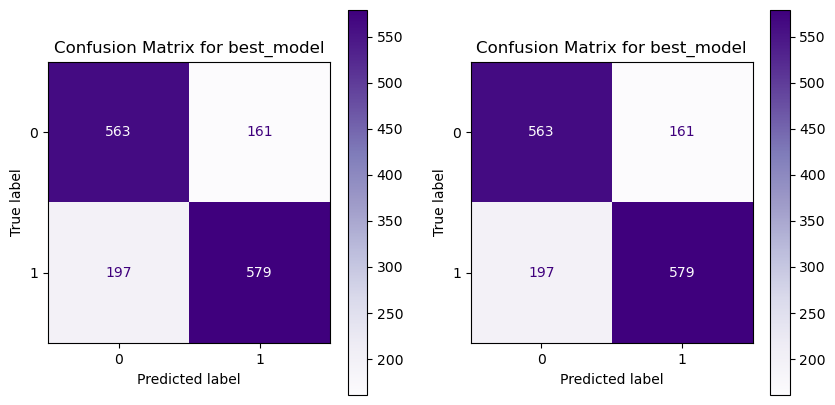

In [44]:
# Here's the best model we'll use for the predictor
best_model = BernoulliNB(alpha=0.76).fit(X_train_tfidf, y_train)
display(show_metrics(best_model))
plot_confusion_matrix(best_model, best_model)

## Predicting Movie Status

Now we can use our fine-tuned and throughly tested model to predict the Rotten Tomato status of various movies in the testing dataset!

(Note: In the model, we didn't specify the difference between 'Fresh' and 'Certified-Fresh' because the `'review_type'` column in the data set didn't make the distinction. Therefore, these two values should be considered the same for the purpose of this exploration.)

In [23]:
def predict_rating(movie_title):
    """
    Predicts and prints out the percentage of positive critic reviews, the predicted 
    tomatometer status, and the actual movie status of the given movie title; if the
    movie title isn't found in the database, nothing if outputted
    
    >>> predict_rating("Paddington")
    Percentage of Positive Reviews: 74.53%
    Predicted Movie Status: Fresh
    Actual Movie Status: Certified-Fresh
    
    >>> predict_rating("It")
    Percentage of Positive Reviews: 55.53%
    Predicted Movie Status: Rotten
    Actual Movie Status: Fresh

    >>> predict_rating("The Master of Disguise")
    Percentage of Positive Reviews: 12.5%
    Predicted Movie Status: Rotten
    Actual Movie Status: Rotten
    """
    new_df = reviews_data.loc[reviews_data["movie_title"] == movie_title]
    prediction = best_model.predict(tfidf_vectorizer.transform(new_df['review_content']).toarray())
    percentage = prediction.sum()/len(prediction) * 100
    predicted_status = "Fresh" if percentage >= 60.00 else "Rotten" # This is the real test Rotten Tomatoes uses
    print(f"Percentage of Positive Reviews: {round(percentage, 2)}%")
    print(f"Predicted Movie Status: {predicted_status}")
    actual_status = reviews_data["tomatometer_status"].loc[reviews_data["movie_title"] == movie_title].unique()
    print(f"Actual Movie Status: {actual_status[0]}")

doctest.testmod()

TestResults(failed=0, attempted=3)

In [24]:
movie_title = input("Which movie do you want to predict the score for? ").strip()
while movie_title not in reviews_data.loc[:, "movie_title"].values:
    print(f"'{movie_title}' was not found in the data base, please try again")
    movie_title = input("Which movie do you want to predict the score for? ")
predict_rating(movie_title)

Which movie do you want to predict the score for?  Marvel's The Avenger


'Marvel's The Avenger' was not found in the data base, please try again


Which movie do you want to predict the score for?  Marvel's: The Avenger


'Marvel's: The Avenger' was not found in the data base, please try again


Which movie do you want to predict the score for?  Marvel's: The Avengers


'Marvel's: The Avengers' was not found in the data base, please try again


Which movie do you want to predict the score for?  Marvel's The Avengers


Percentage of Positive Reviews: 61.06%
Predicted Movie Status: Fresh
Actual Movie Status: Certified-Fresh


## Sources
- scikit-learn Documentation: https://scikit-learn.org/stable/index.html
- https://www.kaggle.com/code/amroaskar/rotten-tomatoes-movies-rating-prediction
- https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/
- https://thedigitalskye.com/2021/04/19/6-useful-metrics-to-evaluate-binary-classification-models/